<a href="https://colab.research.google.com/github/murakamixi/suumo_cnn_tensorflow/blob/train_cmm/load_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
import numpy as np

from keras.models import Model
from keras import optimizers
from keras.layers import Input
from tensorflow.keras.applications.vgg16 import VGG16
import os

In [ ]:
classes = ['bathroom', 'genkan', 'kitchen', 'mitorizu', 'senmenjo', 'wc',]
nb_classes = len(classes)

img_width, img_height = 64, 64

#traning and validation data dir
train_data_dir = './data/train'
validation_data_dir = './data/validation'

nb_train_samples = 81
nb_validation_samples = 81

batch_size = 16
nb_epoch = 10

# パラメータの保存先
result_dir = './result'

In [ ]:
# VGG16のロード。FC層は不要なので include_top=False
input_tensor = Input(shape=(img_width, img_height, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

# FC層の作成
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(nb_classes, activation='softmax'))

# VGG16とFC層を結合してモデルを作成
vgg_model = Model(inputs=vgg16.input, outputs=top_model(vgg16.output))

# 学習済みモデルの重みをロード
vgg_model.load_weights(os.path.join(result_dir, 'finetuning.h5'))

In [ ]:
# 多クラス分類を指定
vgg_model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
            metrics=['accuracy'])

# 予測の確認

In [ ]:
from keras.preprocessing import image
import PIL

filename = './data/train/bathroom/11_7.jpg'

img = image.load_img(filename, target_size=(img_height, img_width))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# 学習時にImageDataGeneratorのrescaleで正規化したので同じ処理が必要！
# これを忘れると結果がおかしくなるので注意
x = x / 255.0

input file name : ./data/train/bathroom/11_7.jpg 
pred label : bathroom


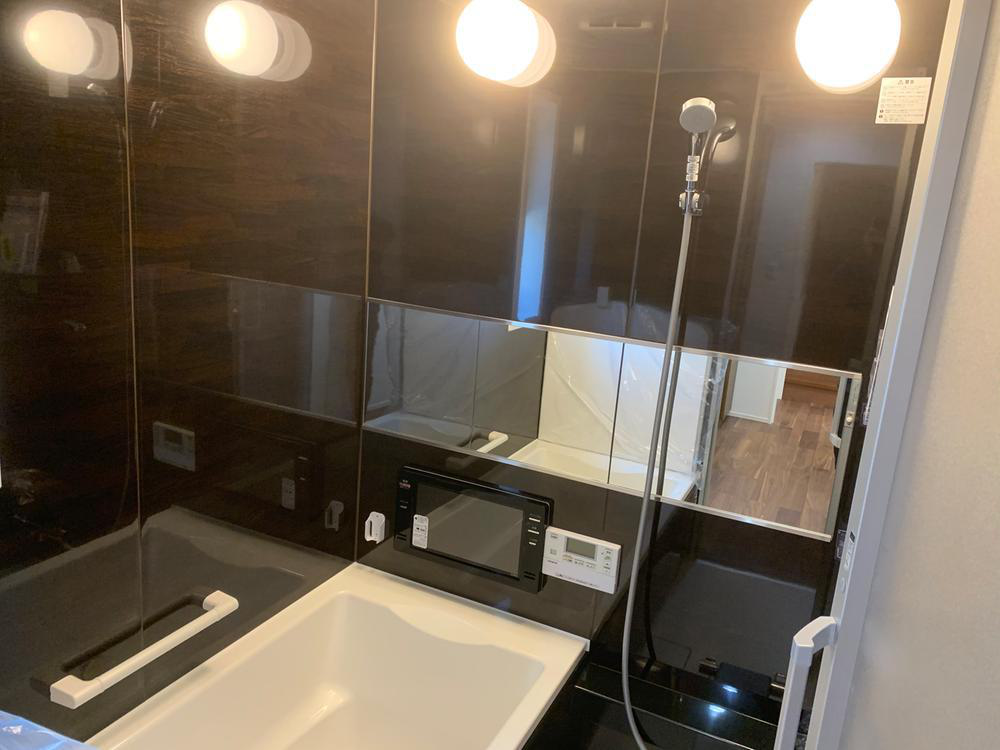

In [ ]:
# クラスを予測
# 入力は1枚の画像なので[0]のみ
pred = vgg_model.predict(x)[0]

pred_label = classes[pred.argmax()]

print('input file name : {} \npred label : {}'.format(filename, pred_label))
PIL.Image.open(filename)